In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap


colors = ['#E2DFD0', '#32012F']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=21)

C:\Users\15510\AppData\Local\Temp\ipykernel_19552\3587239173.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


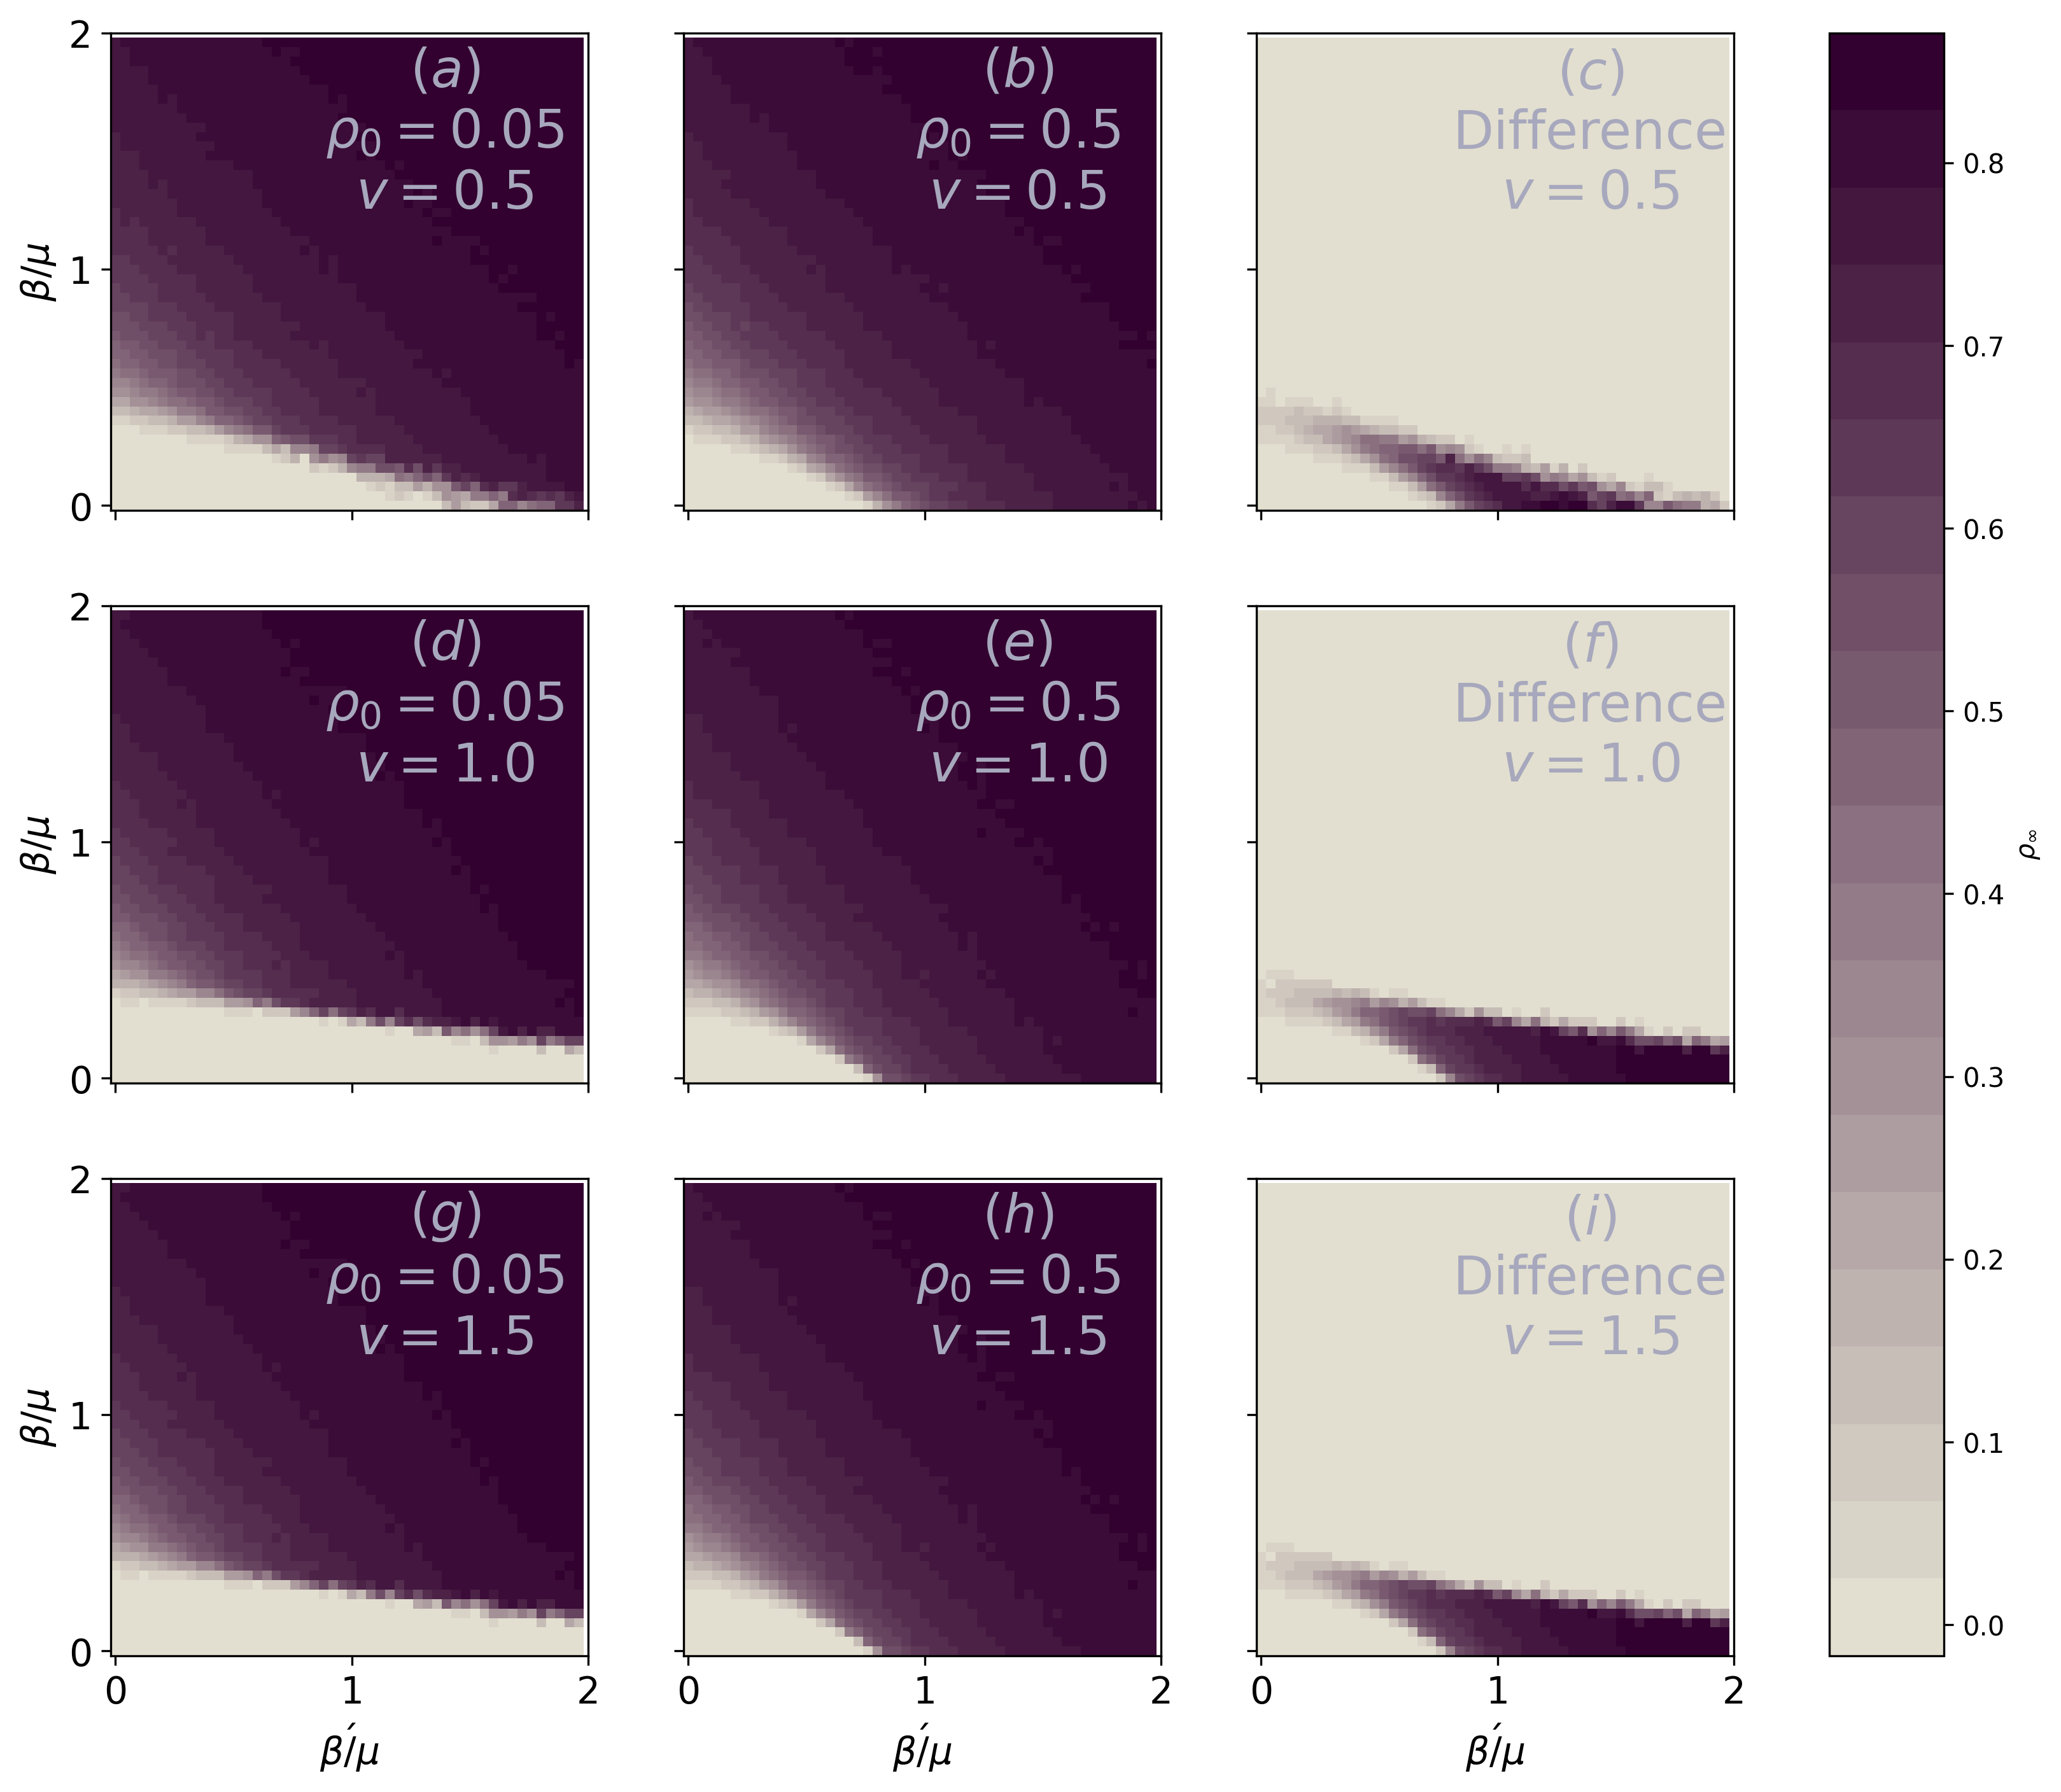

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import LinearSegmentedColormap

# 读取模拟结果数据
df = pd.read_csv('../simulation_result/Fig08.csv', header=None)
df.columns = ['infect_result', 'beta', 'beta_h', 'mu', 'seed', 'speed', 'sign', 'id'] + [
    "S_K", "S_HighOrderK", "S_CC_Ratio",
    "I_K", "I_HighOrderK", "I_CC_Ratio",
    "A_K", "A_HighOrderK", "A_CC_Ratio"
]
df = df.groupby(by=['id', 'sign']).mean()

# 根据种子值分组并计算数据差异
parameters = [(seed, speed) for seed in [0.05, 0.5] for speed in [0.5, 1.0, 1.5]]
speed_map = [0.5, 1.0, 1.5]
names = locals()  # 获取本地命名空间
for speed in speed_map:
    var_name = 'df_' + str(int(speed) * 10)
    temp_data1 = df.loc[(df['speed'] == speed) & (df['seed'] == 0.05), ['beta', 'beta_h', 'infect_result']].round(3).pivot('beta', 'beta_h', 'infect_result').fillna(0)
    temp_data2 = df.loc[(df['speed'] == speed) & (df['seed'] == 0.5), ['beta', 'beta_h', 'infect_result']].round(3).pivot('beta', 'beta_h', 'infect_result').fillna(0)
    names[var_name + '_1'] = temp_data1
    names[var_name + '_2'] = temp_data2
    names[var_name + '_3'] = temp_data2 - temp_data1

# 创建一个 2x3 的子图布局
fig = plt.figure(figsize=(12, 12), dpi=300)
grids = ImageGrid(fig, rect=(0.1, 0.15, 0.8, 0.8), nrows_ncols=(3, 3),
                  axes_pad=0.5, label_mode="L", cbar_location="right", cbar_mode="single", cbar_size="8%")



# 标题描述信息
titles = [
    r'$(a)$' + '\n' + r'$\rho_0 = 0.05$' + '\n' + r'$v=0.5$', r'$(b)$' + '\n' + r'$\rho_0 = 0.5$' + '\n' + r'$v=0.5$', r'$(c)$' + '\n' + 'Difference' + '\n' + r'$v=0.5$',
    r'$(d)$' + '\n' + r'$\rho_0 = 0.05$' + '\n' + r'$v=1.0$', r'$(e)$' + '\n' + r'$\rho_0 = 0.5$' + '\n' + r'$v=1.0$', r'$(f)$' + '\n' + 'Difference' + '\n' + r'$v=1.0$',
    r'$(g)$' + '\n' + r'$\rho_0 = 0.05$' + '\n' + r'$v=1.5$', r'$(h)$' + '\n' + r'$\rho_0 = 0.5$' + '\n' + r'$v=1.5$', r'$(i)$' + '\n' + 'Difference' + '\n' + r'$v=1.5$'
]

# 绘制热力图
for grid, data, title in zip(grids, [names.get('df_' + str(int(speed) * 10) + f'_{str(num)}')  
                                     for speed in speed_map for num in [1, 2, 3]], titles):
    im = grid.imshow(data, cmap=cmap, origin='lower')
    grids.cbar_axes[0].colorbar(im)
    grid.grid(visible=False)
    grid.set_xticks([0, 25, 50])
    grid.set_yticks([0, 25, 50])
    grid.set_xticklabels([0, 1, 2])
    grid.set_yticklabels([0, 1, 2])
    grid.tick_params(labelsize=14)
    grid.set_ylabel(r'$\beta/\mu$', fontsize=14)
    grid.set_xlabel(r'$\beta\'/\mu$', fontsize=14)
    grid.set_title(title, y=0.6, x=0.7, fontsize=20, c='#a7a8bd')

# 设置颜色条标签
cax = grids.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text("$\\rho_{\infty}$")

# 调整布局并保存图像
plt.tight_layout()
plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig08_speed.png', format='png', bbox_inches='tight',dpi=300)
plt.show()


C:\Users\15510\AppData\Local\Temp\ipykernel_19552\2338511890.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


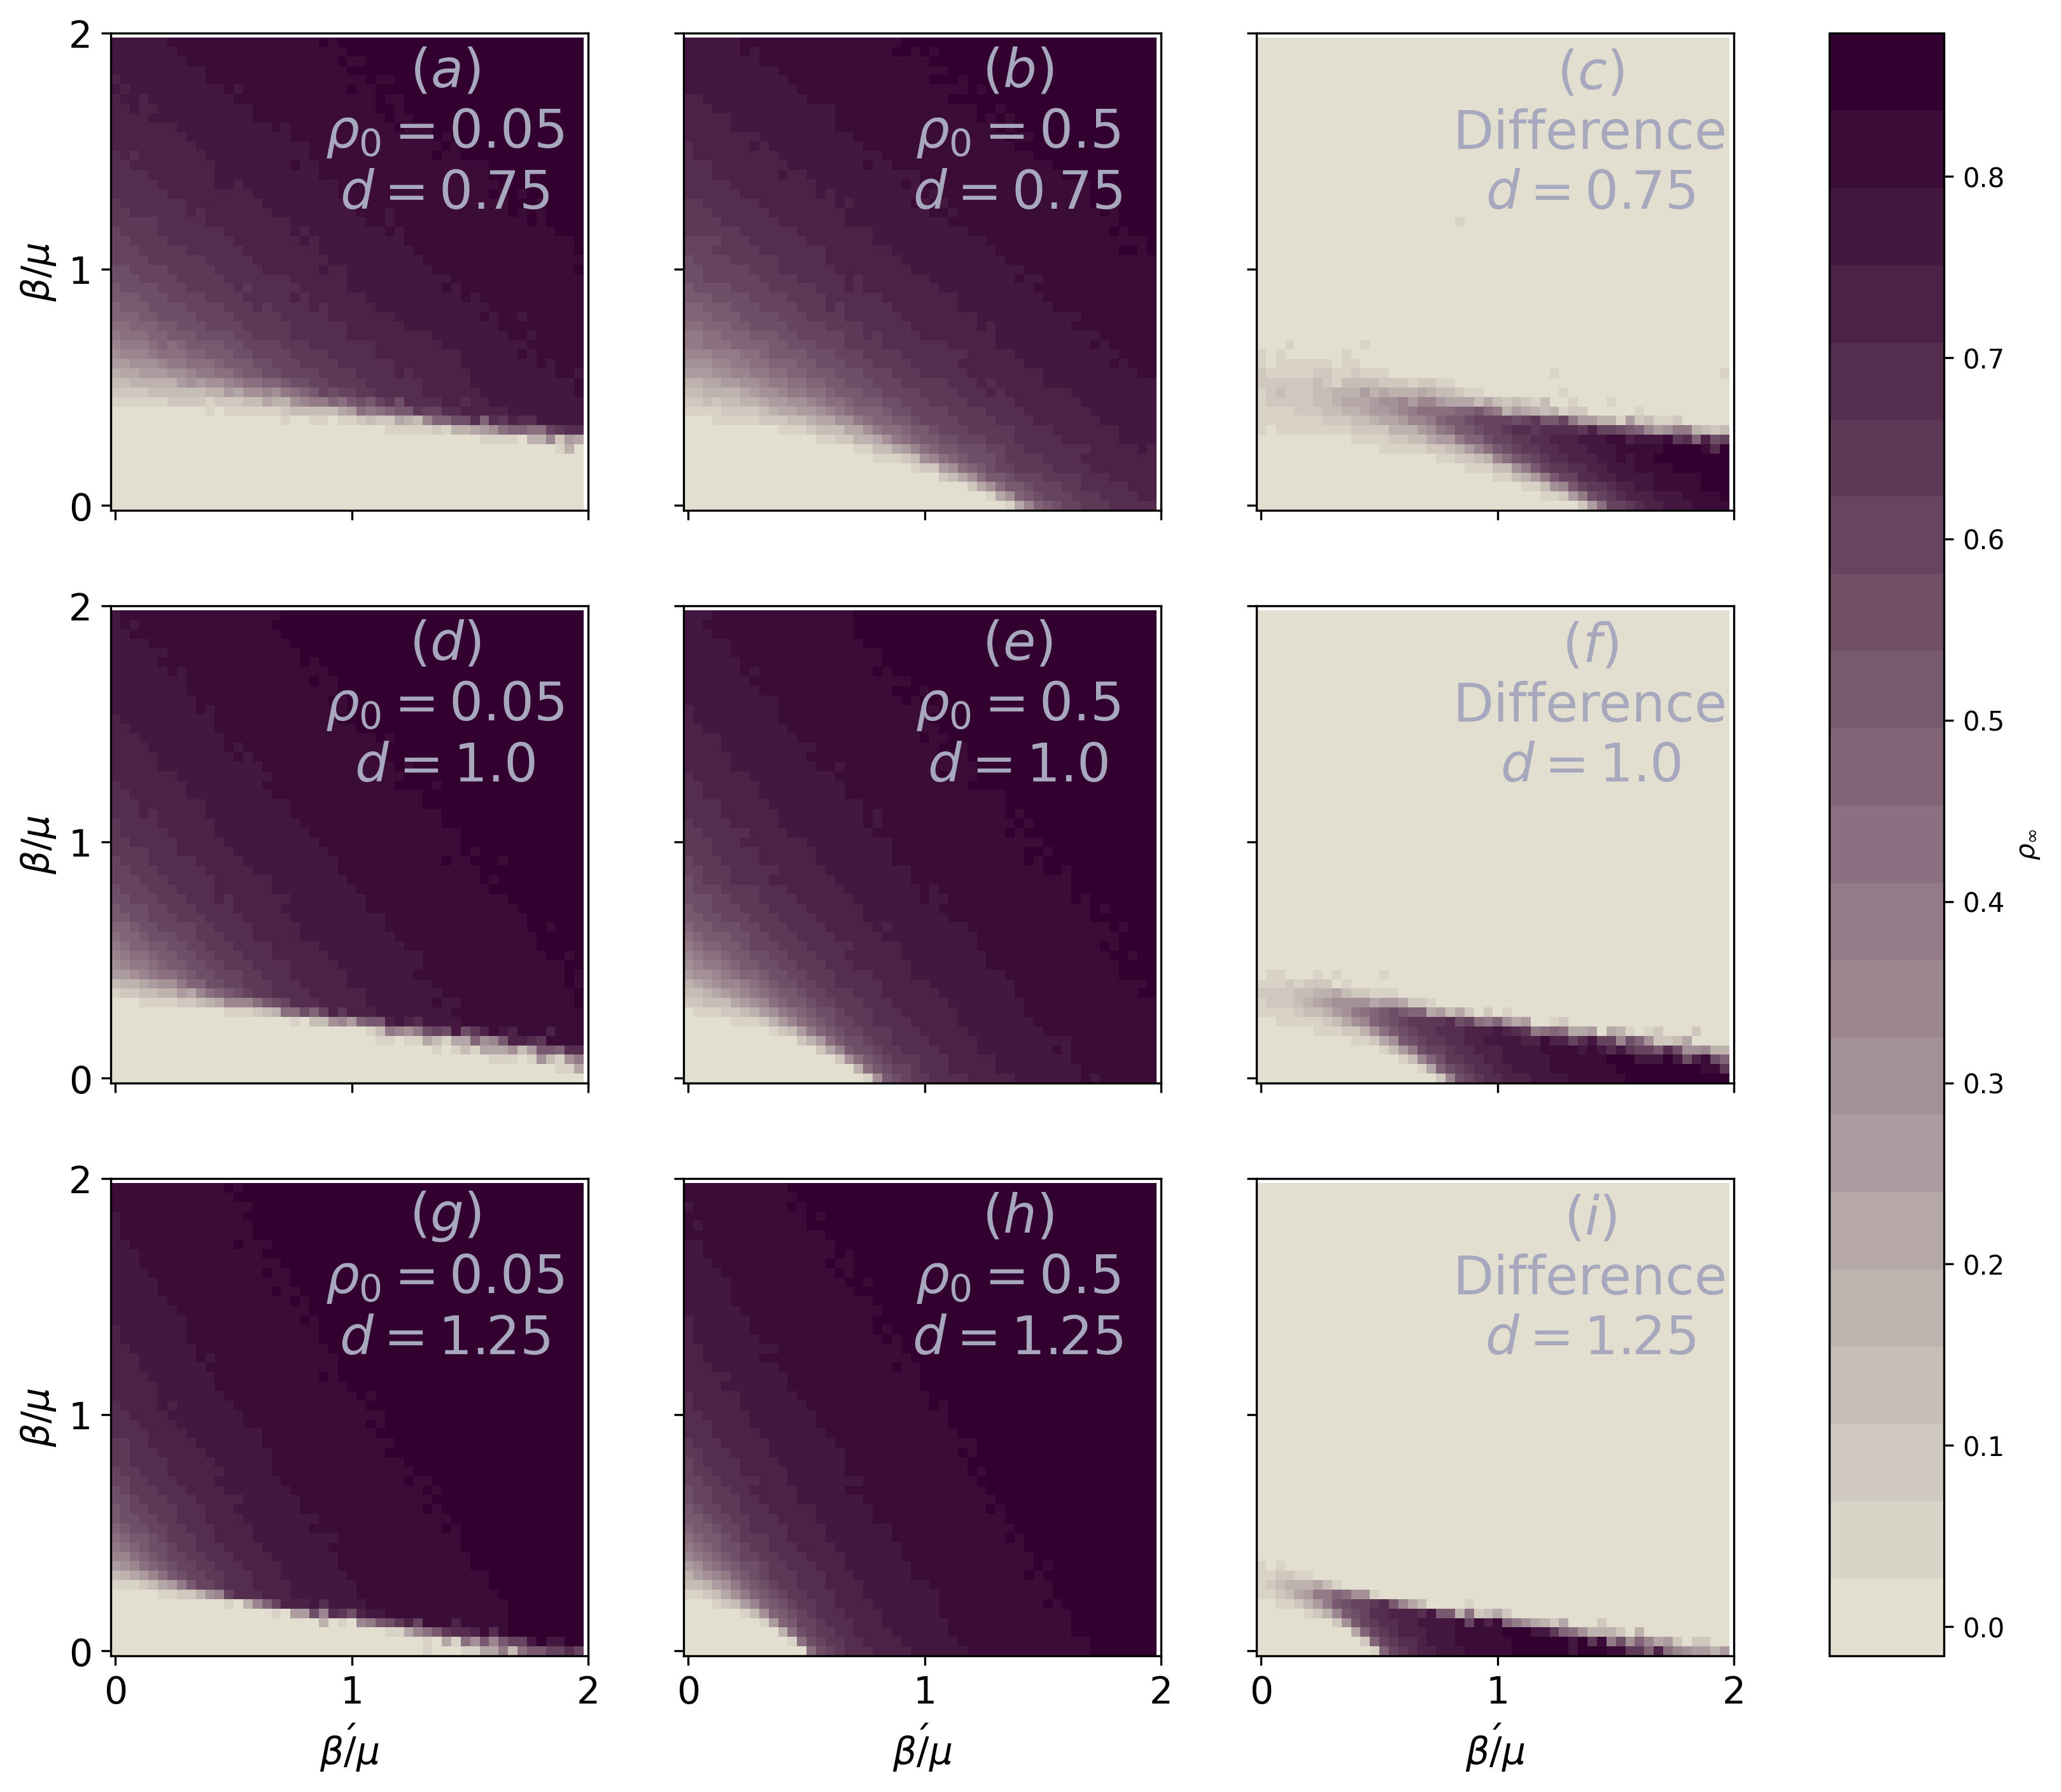

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import LinearSegmentedColormap

# 读取模拟结果数据
df = pd.read_csv('../simulation_result/Fig07.csv', header=None)
df.columns = ['infect_result', 'beta', 'beta_h', 'mu', 'seed', 'population', 'sign', 'id'] + [
    "S_K", "S_HighOrderK", "S_CC_Ratio",
    "I_K", "I_HighOrderK", "I_CC_Ratio",
    "A_K", "A_HighOrderK", "A_CC_Ratio"
]
df = df.groupby(by=['id', 'sign']).mean()

# 根据种子值分组并计算数据差异
parameters = [(seed, population) for seed in [0.05, 0.5] for population in [1200, 1600, 2000]]
population_map = [1200, 1600, 2000]
names = locals()  # 获取本地命名空间
for population in population_map:
    var_name = 'df_' + str(int(population) * 10)
    temp_data1 = df.loc[(df['population'] == population) & (df['seed'] == 0.05), ['beta', 'beta_h', 'infect_result']].round(3).pivot('beta', 'beta_h', 'infect_result').fillna(0)
    temp_data2 = df.loc[(df['population'] == population) & (df['seed'] == 0.5), ['beta', 'beta_h', 'infect_result']].round(3).pivot('beta', 'beta_h', 'infect_result').fillna(0)
    names[var_name + '_1'] = temp_data1
    names[var_name + '_2'] = temp_data2
    names[var_name + '_3'] = temp_data2 - temp_data1

# 创建一个 2x3 的子图布局
fig = plt.figure(figsize=(12, 12), dpi=300)

grids = ImageGrid(fig, rect=(0.1, 0.15, 0.8, 0.8), nrows_ncols=(3, 3),
                  axes_pad=0.5, label_mode="L", cbar_location="right", cbar_mode="single", cbar_size="8%")



# 标题描述信息
titles = [
    r'$(a)$' + '\n' + r'$\rho_0 = 0.05$' + '\n' + r'$d=0.75$', r'$(b)$' + '\n' + r'$\rho_0 = 0.5$' + '\n' + r'$d=0.75$', r'$(c)$' + '\n' + 'Difference' + '\n' + r'$d=0.75$',
    r'$(d)$' + '\n' + r'$\rho_0 = 0.05$' + '\n' + r'$d=1.0$', r'$(e)$' + '\n' + r'$\rho_0 = 0.5$' + '\n' + r'$d=1.0$', r'$(f)$' + '\n' + 'Difference' + '\n' + r'$d=1.0$',
    r'$(g)$' + '\n' + r'$\rho_0 = 0.05$' + '\n' + r'$d=1.25$', r'$(h)$' + '\n' + r'$\rho_0 = 0.5$' + '\n' + r'$d=1.25$', r'$(i)$' + '\n' + 'Difference' + '\n' + r'$d=1.25$'
]

# 绘制热力图
for grid, data, title in zip(grids, [names.get('df_' + str(int(population) * 10) + f'_{str(num)}')  
                                     for population in population_map for num in [1, 2, 3]], titles):
    im = grid.imshow(data, cmap=cmap, origin='lower')
    grids.cbar_axes[0].colorbar(im)
    grid.grid(visible=False)
    grid.set_xticks([0, 25, 50])
    grid.set_yticks([0, 25, 50])
    grid.set_xticklabels([0, 1, 2])
    grid.set_yticklabels([0, 1, 2])
    grid.tick_params(labelsize=14)
    grid.set_ylabel(r'$\beta/\mu$', fontsize=14)
    grid.set_xlabel(r'$\beta\'/\mu$', fontsize=14)
    grid.set_title(title, y=0.6, x=0.7, fontsize=20, c='#a7a8bd')

# 设置颜色条标签
cax = grids.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text("$\\rho_{\infty}$")

# 调整布局并保存图像
plt.tight_layout()
plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig07_population.png', format='png', bbox_inches='tight',dpi = 300)
plt.show()


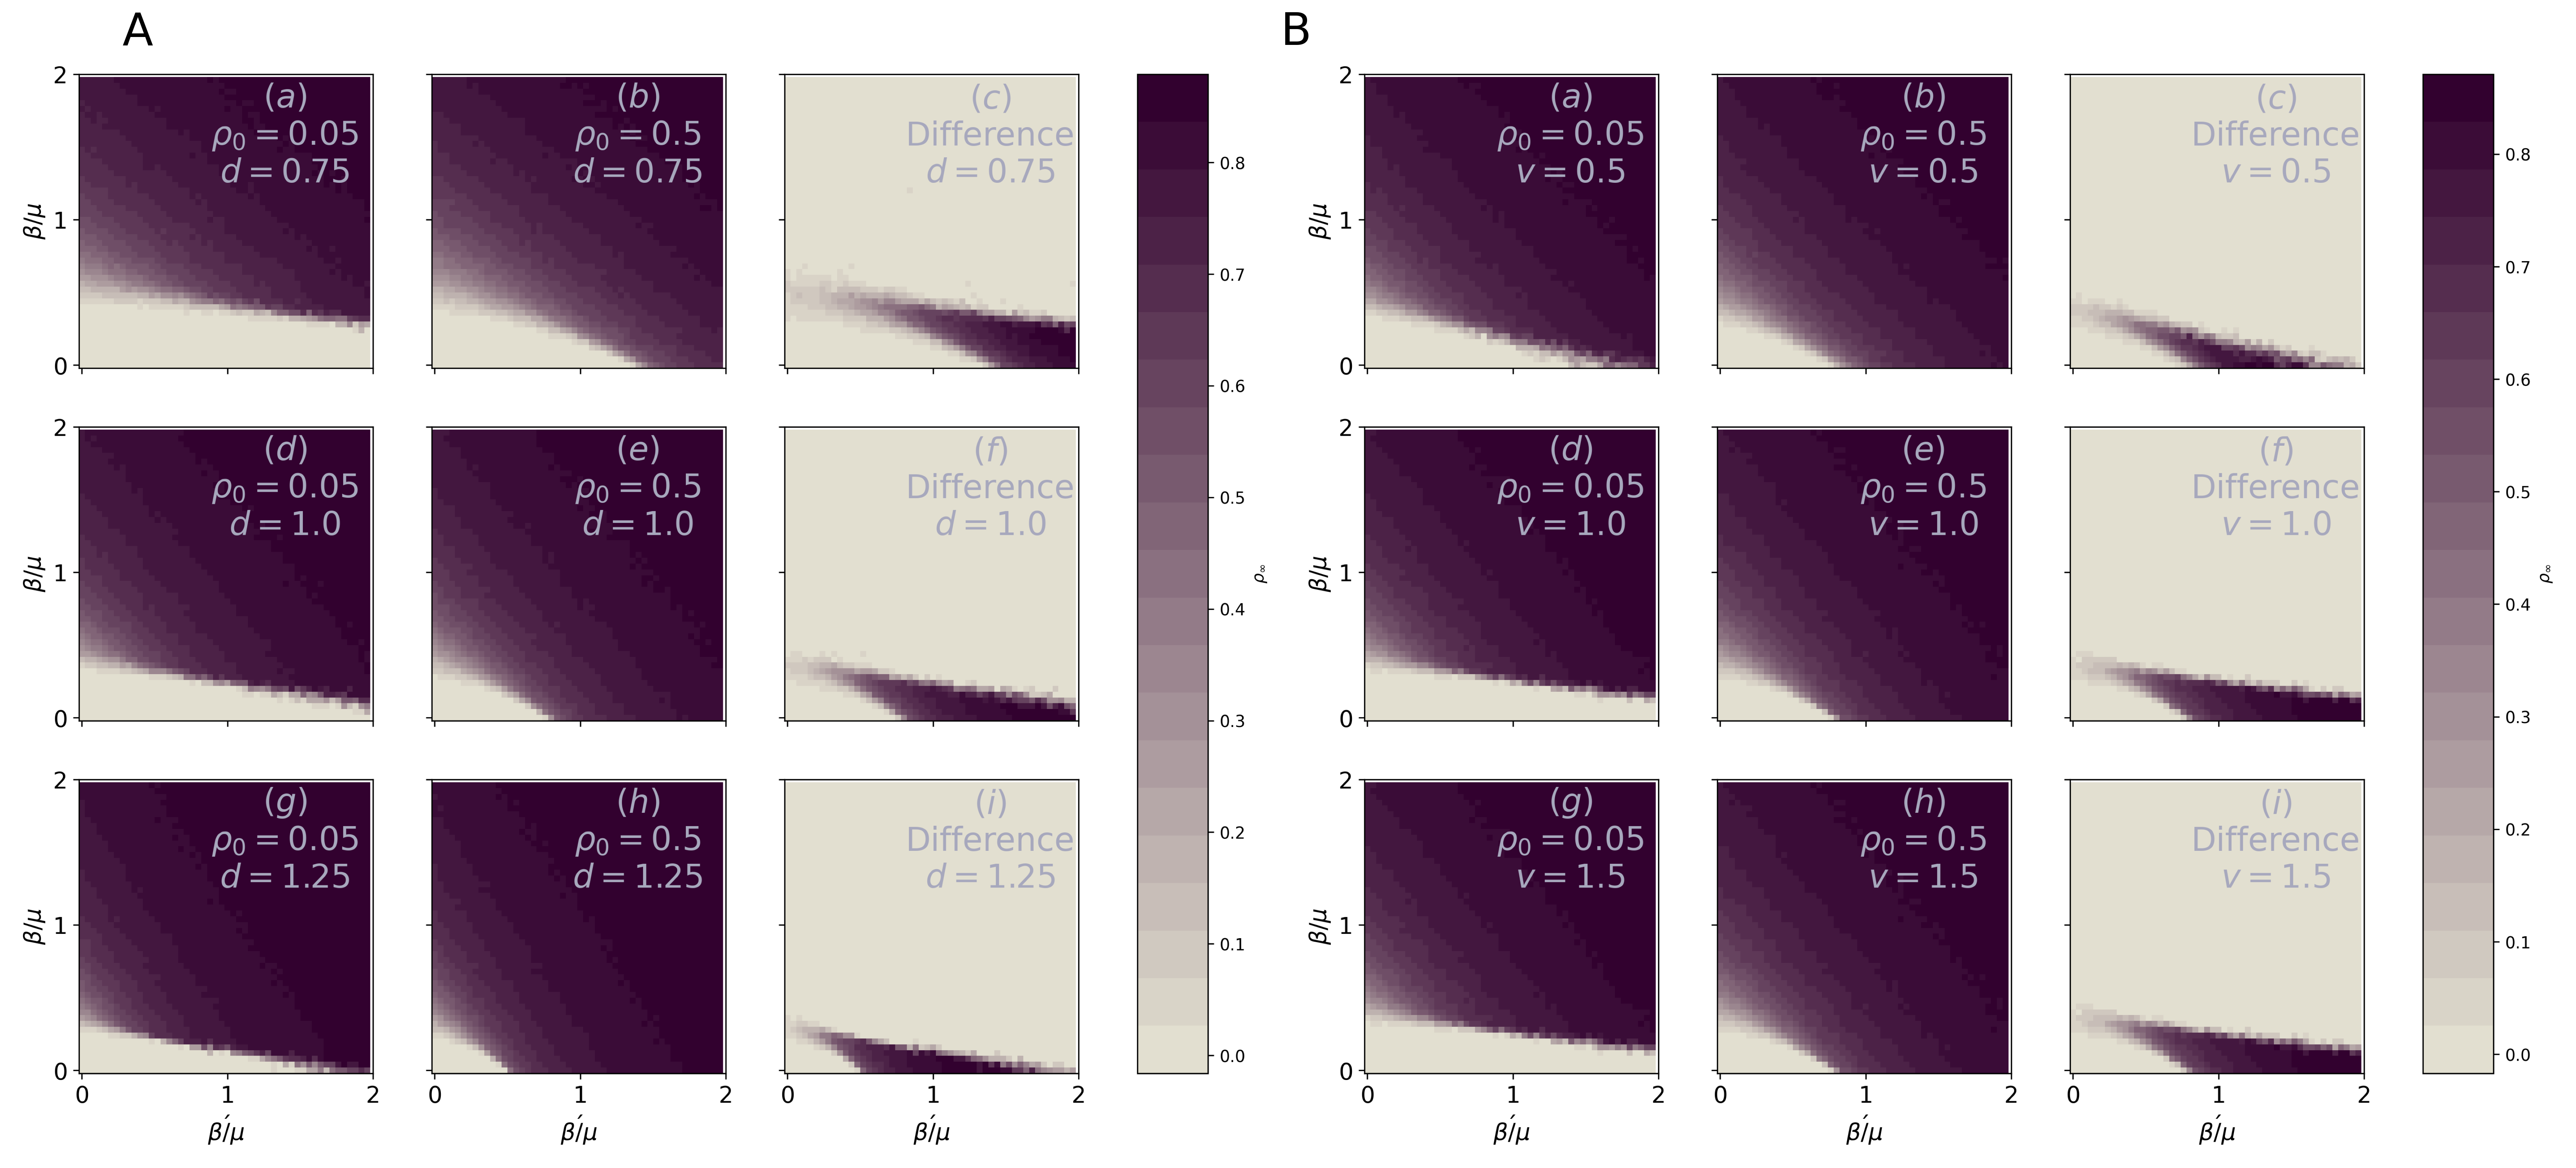

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the PDF files and specify the page to open (page index starts from 0)
image_A = Image.open('D:\\科研任务\\HighOrder-Ada\\FIG\\Fig07_population.png')
image_B = Image.open('D:\\科研任务\\HighOrder-Ada\\FIG\\Fig08_speed.png')

# Select the first page from each PDF file
image_A = image_A.convert('RGB')  # Convert to RGB format for compatibility with matplotlib
image_B = image_B.convert('RGB')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 12), dpi=300)

# Plot the images
axes[0].imshow(image_A)
axes[0].axis('off')
axes[0].set_title('A',x = 0.1,fontsize = 30)

axes[1].imshow(image_B)
axes[1].axis('off')
axes[1].set_title('B',x = 0,fontsize = 30)

# Adjust layout
plt.tight_layout()
plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig078.pdf', format='pdf', bbox_inches='tight')

# Show the concatenated image
plt.show()
